In [2]:
# import libraries for numerical functions and plotting
import numpy as np
import matplotlib.pyplot as plt



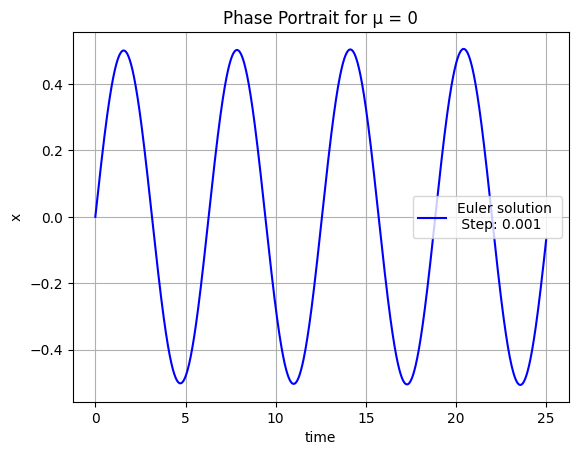

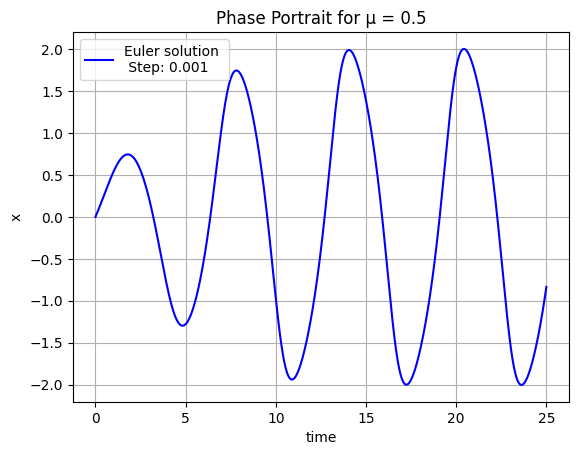

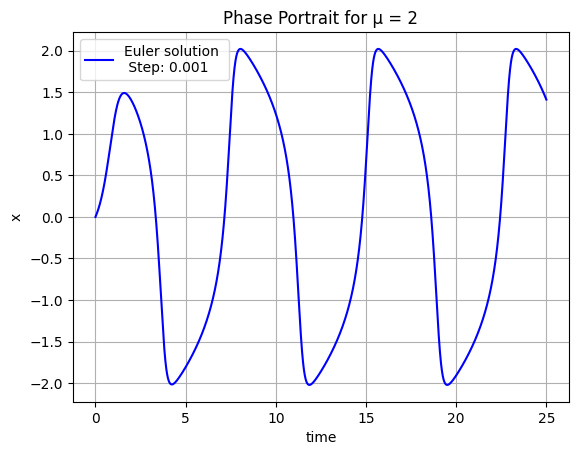

In [56]:
### VDP  time vs position
# Mu Constant

def run(u):
  f = lambda t,z1,z2: z2
  g = lambda t,z1,z2: u*(1-z1**2)*z2-z1

  #Step Size
  dt = 0.001
  time = np.arange(0, 25.001, dt)

  z1 = np.zeros_like(time)
  z2 = np.zeros_like(time)
  # initial conditions
  z1[0] = 0
  z2[0] = 0.5

  # Forward Euler iterations
  for idx, t in enumerate(time[:-1]):
      z1[idx+1] = z1[idx] + dt*f(t, z1[idx], z2[idx])
      z2[idx+1] = z2[idx] + dt*g(t, z1[idx], z2[idx])

  pz1 = []
  pz2 = []

  # Cosmetic Points

  for i in range(len(z1)):
    if i % 20 == 0:
      pz1.append(z1[i])

  for i in range(len(z2)):
    if i % 20 == 0:
      pz2.append(z2[i])

  # Plots
  plt.plot(time, z1, '-', label='Euler solution \n Step: ' + str(dt), color = 'blue')
  # plt.plot(pz1, pz2, 'o', color = 'blue')
  plt.xlabel('time')
  plt.ylabel('x')
  plt.legend()
  plt.grid(True)


  plt.title('Phase Portrait for μ = ' + str(u))
  plt.show()

for u in [0, 0.5, 2]:
  run(u)




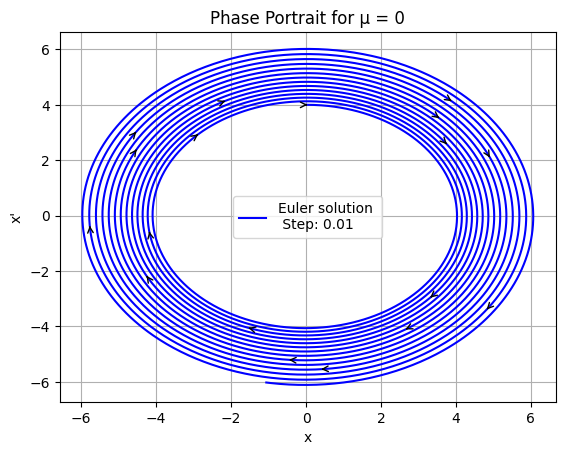

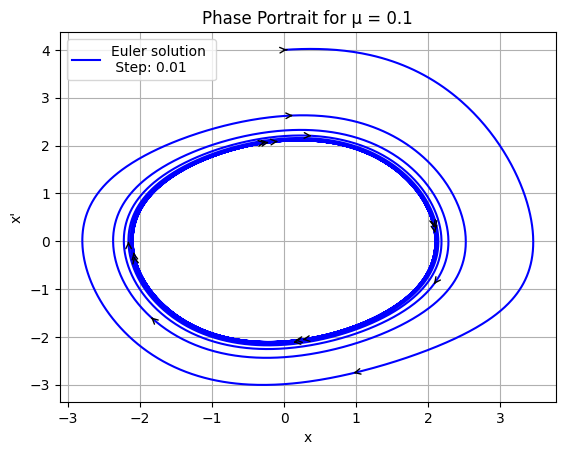

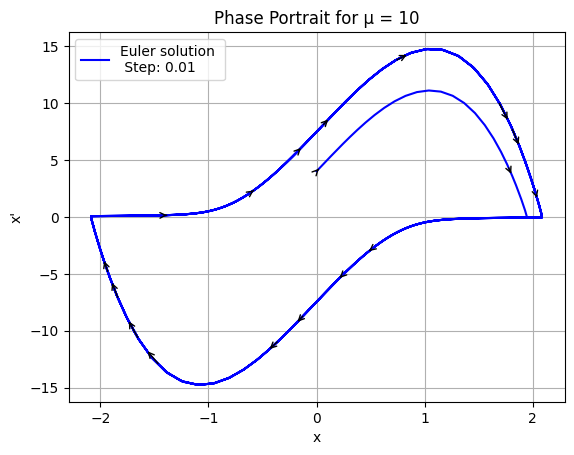

In [57]:
### VDP  position vs velocity
# Mu Constant

def run2(u):
  f = lambda t,z1,z2: z2
  g = lambda t,z1,z2: u*(1-z1**2)*z2-z1

  #Step Size
  dt = 0.01
  time = np.arange(0, 85.001, dt)

  z1 = np.zeros_like(time)
  z2 = np.zeros_like(time)
  # initial conditions
  z1[0] = 0
  z2[0] = 4

  # Forward Euler iterations
  for idx, t in enumerate(time[:-1]):
      z1[idx+1] = z1[idx] + dt*f(t, z1[idx], z2[idx])
      z2[idx+1] = z2[idx] + dt*g(t, z1[idx], z2[idx])

  pz1 = []
  pz2 = []

  # Cosmetic Points

  for i in range(len(z1)):
    if i % 20 == 0:
      pz1.append(z1[i])

  for i in range(len(z2)):
    if i % 20 == 0:
      pz2.append(z2[i])

  # Plots
  plt.plot(z1, z2, '-', label='Euler solution \n Step: ' + str(dt), color = 'blue')
  # plt.plot(pz1, pz2, 'o', color = 'blue')
  plt.xlabel('x')
  plt.ylabel("x'")
  plt.legend()
  plt.grid(True)

  # compute the distances, ds, between points
  dx, dy = z1[+1:]-z1[:-1],  z2[+1:]-z2[:-1]
  ds = np.array((0, *np.sqrt(dx*dx+dy*dy)))

  # compute the total distance from the 1st point, measured on the curve
  s = np.cumsum(ds)

  # interpolate
  xinter = np.interp(np.linspace(0,s[-1], 20), s, z1)
  yinter = np.interp(np.linspace(0,s[-1], 20), s, z2)

  # plot the interpolated points
  for i in range(len(xinter) - 2):
      xc, yc = xinter[i], yinter[i]
      plt.annotate('', xy=(xc + dt*f(t, xc, yc), yc + dt*g(t, xc, yc)), xytext=(xc, yc),
                  arrowprops=dict(facecolor='blue',  arrowstyle = '->'))

  plt.title('Phase Portrait for μ = ' + str(u))

  plt.show()

for u in [0, 0.1, 10]:
  run2(u)

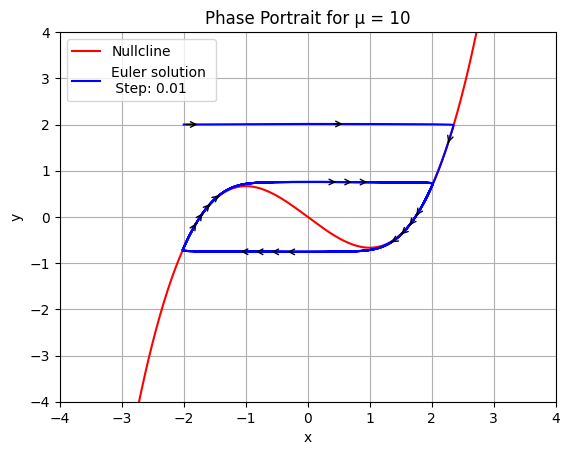

In [58]:
### Strong VDP position vs transform
# Mu Constant
u = 10
f = lambda t,z1,z2: u*(z2-((z1**3)/3-z1))
g = lambda t,z1,z2: -z1/u
xl, xu = -4, 4
yl, yu = -4, 4


# Step Size
dt = 0.01
time = np.arange(0, 85.001, dt)
nullc = np.arange(xl, xu, dt)

z1 = np.zeros_like(time)
z2 = np.zeros_like(time)
z3 = []

# initial conditions
z1[0] = -2
z2[0] = 2

# Forward Euler iterations
for idx, t in enumerate(time[:-1]):
    z1[idx+1] = z1[idx] + dt*f(t, z1[idx], z2[idx])
    z2[idx+1] = z2[idx] + dt*g(t, z1[idx], z2[idx])

for x in (nullc):
  z3.append((1/3)*x**3 - x)

pz1 = []
pz2 = []

# Cosmetic Points

for i in range(len(z1)):
  if i % 20 == 0:
    pz1.append(z1[i])

for i in range(len(z2)):
  if i % 20 == 0:
    pz2.append(z2[i])

# Plots
plt.plot(nullc, z3, '-', label='Nullcline', color = 'red')
line = plt.plot(z1, z2, '-', label='Euler solution \n Step: ' + str(dt), color = 'blue')[0]
plt.xlabel('x')
plt.ylabel("y")
plt.xlim(-4, 4)
plt.ylim(-4, 4)

# #Arrows
# for i in range(0, len(z1) - 10, 550):  # Add arrow every 10 data points
#     plt.annotate('', xy=(z1[i+5], z2[i+5]), xytext=(z1[i], z2[i]),
#                  arrowprops=dict(facecolor='blue',  width = 1, shrink = 0.5))

# compute the distances, ds, between points
dx, dy = z1[+1:]-z1[:-1],  z2[+1:]-z2[:-1]
ds = np.array((0, *np.sqrt(dx*dx+dy*dy)))

# compute the total distance from the 1st point, measured on the curve
s = np.cumsum(ds)

# interpolate
xinter = np.interp(np.linspace(0,s[-1], 20), s, z1)
yinter = np.interp(np.linspace(0,s[-1], 20), s, z2)

# plot the interpolated points
for i in range(len(xinter) - 2):
    xc, yc = xinter[i], yinter[i]
    plt.annotate('', xy=(xc + dt*f(t, xc, yc), yc + dt*g(t, xc, yc)), xytext=(xc, yc),
                 arrowprops=dict(facecolor='blue',  arrowstyle = '->'))

plt.legend()
plt.grid(True)
plt.title('Phase Portrait for μ = ' + str(u))
plt.show()